## Convolutional Neural Network 



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 32.3 MB/s 


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.applications import VGG16, ResNet101V2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import cv2
import numpy as np

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [5]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = "/content/drive/MyDrive/Colab Notebooks/Cats_and_Dogs/train"
val =   "/content/drive/MyDrive/Colab Notebooks/Cats_and_Dogs/val"
test =  "/content/drive/MyDrive/Colab Notebooks/Cats_and_Dogs/test"

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = 20000
# validation set size 
nb_validation_samples = 2490
# test set size
nb_test_samples = 2500

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [6]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [7]:
model = Sequential()

# 1: +Convolutional
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))

# 2: +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 3:
model.add(Conv2D(32, (3, 3)))
#     +Relu
model.add(Activation('relu'))
# 4:  +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 5:  +Convolutional
model.add(Conv2D(64, (3, 3)))
#     +Relu
model.add(Activation('relu'))
# 6:  +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 7:  +Flattening
model.add(Flatten())
# 8:  +Dense
model.add(Dense(64, activation="relu"))
#     +ReLu
# 9:  +Dropout
model.add(Dropout(0.5))
# 10: +Dense
model.add(Dense(1,activation="sigmoid"))
#     +Sigmoid

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

model_history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=15, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/15
312/312 [==============================] - 2795s 9s/step - loss: 0.6006 - accuracy: 0.6680 - val_loss: 0.5001 - val_accuracy: 0.7586
Epoch 2/15
312/312 [==============================] - 91s 290ms/step - loss: 0.4966 - accuracy: 0.7636 - val_loss: 0.4560 - val_accuracy: 0.7928
Epoch 3/15
312/312 [==============================] - 91s 291ms/step - loss: 0.4325 - accuracy: 0.8023 - val_loss: 0.4189 - val_accuracy: 0.8022
Epoch 4/15
312/312 [==============================] - 91s 292ms/step - loss: 0.3852 - accuracy: 0.8319 - val_loss: 0.4149 - val_accuracy: 0.8072
Epoch 5/15
312/312 [==============================] - 90s 288ms/step - loss: 0.3462 - accuracy: 0.8526 - val_loss: 0.3869 - val_accuracy: 0.8289
Epoch 6/15
312/312 [==============================] - 90s 289ms/step - loss: 0.2971 - accuracy: 0.8746 - val_loss: 0.4043 - val_accuracy: 0.8314
Epoch 7/15
312/312 [==============================] - 89s 286ms/step - loss: 0.2560 - accuracy: 0.8935 - val_loss: 0.4678 - val_acc

In [10]:
model.save('/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_Sequential.h5')

In [11]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong

scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy on test data: 85.18%


Plot the graphs: 

- Loss(Number of epochs)

- Accuracy(Number of epochs)

In [12]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


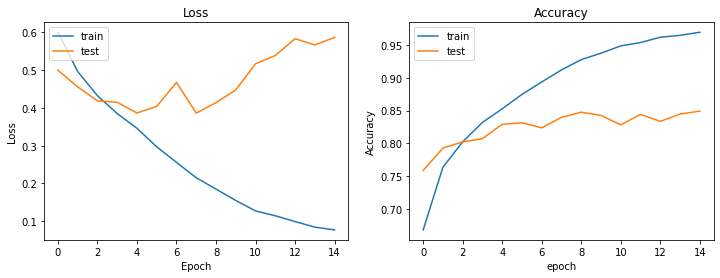

In [13]:
plt.figure(figsize=(12, 4))

# Loss(Number of epochs)
plt.subplot(1, 2, 1)
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "test"], loc="upper left")

# Accuracy(Number of epochs)
plt.subplot(1, 2, 2)
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")

plt.show()

In [14]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('/content/drive/My Drive/Deeper.jpeg')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()


FileNotFoundError: ignored

Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [15]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [16]:
# add layers to VGG16:

model = Sequential()
model.add(vgg16_net)

# + flattening
model.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
# + ReLu
model.add(Dense(256, activation="relu"))
# + Dropout
model.add(Dropout(0.5))
# + Dense layer with 1 neuron
# + sigmoid
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-5),
              metrics=['accuracy'])

E.g., it was like:


In [ ]:
img = mpimg.imread('/content/drive/My Drive/VGG16.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

and it becomes:

In [ ]:
img = mpimg.imread('/content/drive/My Drive/VGG162.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

In [18]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

model_history_vgg = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/5
312/312 [==============================] - 107s 333ms/step - loss: 0.5103 - accuracy: 0.7423 - val_loss: 0.3554 - val_accuracy: 0.8549
Epoch 2/5
312/312 [==============================] - 98s 314ms/step - loss: 0.3409 - accuracy: 0.8522 - val_loss: 0.2982 - val_accuracy: 0.8828
Epoch 3/5
312/312 [==============================] - 97s 310ms/step - loss: 0.2971 - accuracy: 0.8747 - val_loss: 0.2746 - val_accuracy: 0.8890
Epoch 4/5
312/312 [==============================] - 97s 312ms/step - loss: 0.2741 - accuracy: 0.8841 - val_loss: 0.2631 - val_accuracy: 0.8968
Epoch 5/5
312/312 [==============================] - 98s 313ms/step - loss: 0.2578 - accuracy: 0.8902 - val_loss: 0.2495 - val_accuracy: 0.9034


In [19]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Accuracy on test data: 88.70%


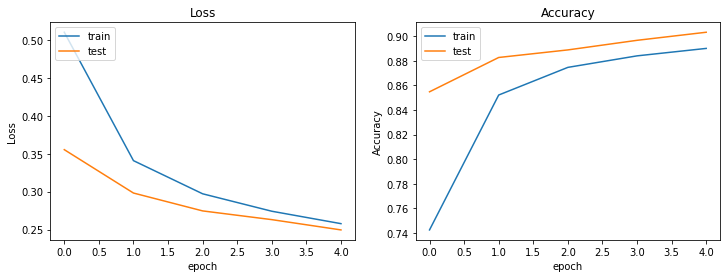

In [20]:
plt.figure(figsize=(12, 4))

# Loss(Number of epochs)
plt.subplot(1, 2, 1)
plt.plot(model_history_vgg.history["loss"])
plt.plot(model_history_vgg.history["val_loss"])
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")

# Accuracy(Number of epochs)
plt.subplot(1, 2, 2)
plt.plot(model_history_vgg.history["accuracy"])
plt.plot(model_history_vgg.history["val_accuracy"])
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")

plt.show()

In [21]:
model.save("/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_vgg16.h5")

In [22]:
def predict_class(custom_img_path, model_animal):
    test_img = cv2.imread(custom_img_path)
    test_img = cv2.resize(test_img, (150, 150))
    test_img = np.array(test_img).reshape((1, 150, 150, 3))

    result = model_animal.predict(test_img)
    if result.astype(int).item() == 0:
        print("Cat")
    elif result.astype(int).item() == 1:
        print("Dog")
    else:
        print("Don't know")

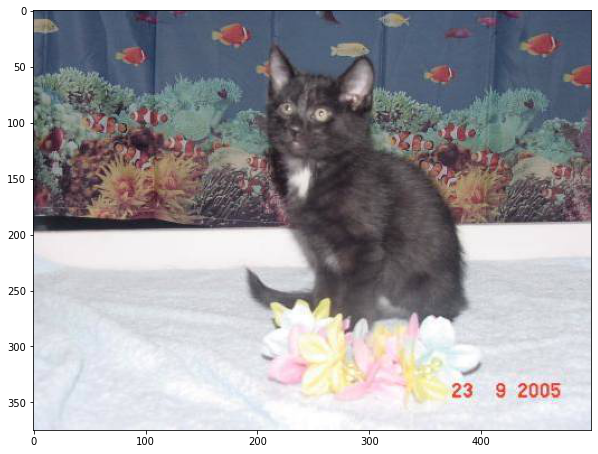

In [23]:
cat_img = "/content/drive/MyDrive/Colab Notebooks/cat.jpg"
img = mpimg.imread(cat_img)
plt.figure(figsize = (10, 10))
plt.imshow(img)
plt.show()

In [24]:
predict_class(cat_img, model)

Cat


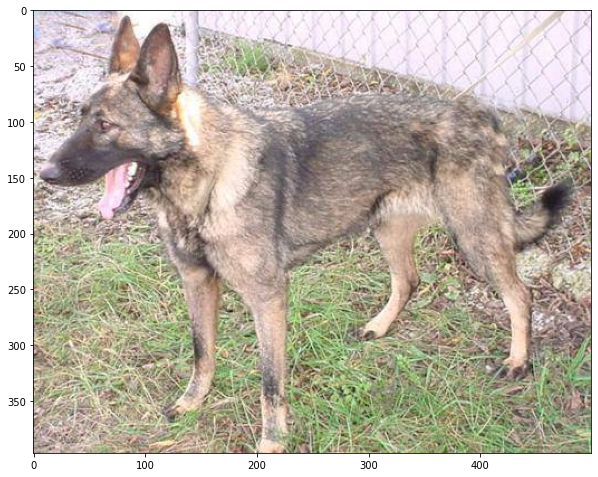

In [25]:
dog_img = "/content/drive/MyDrive/Colab Notebooks/dog.jpg"
img = mpimg.imread(dog_img)
plt.figure(figsize = (10, 10))
plt.imshow(img)
plt.show()

In [26]:
predict_class(dog_img, model)

Dog


In [27]:
resnet = ResNet101V2(
    weights="imagenet",
    include_top=False,
    input_shape=(150, 150, 3)
)
resnet.trainable = False
resnet.summary()

171327488/171317808 [==============================] - 5s 0us/step
Model: "resnet101v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPaddi

In [28]:
# add layers to ResNet101V2:
model = Sequential()
model.add(resnet)
# + flattening
model.add(Flatten())
# + dense connected layer with 256 neurons
# + ReLu
model.add(Dense(256, activation="relu"))
# + Dropout
model.add(Dropout(0.5))
# + full layer with 1 neuron
# + sigmoid
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 5, 5, 2048)        42626560  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               13107456  
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 55,734,273
Trainable params: 13,107,713
Non-trainable params: 42,626,560
_________________________________________________________________


In [29]:
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=1e-5),
    metrics=["accuracy"]
)

In [30]:
model_histiry_resnet = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
312/312 [==============================] - 110s 330ms/step - loss: 0.2333 - accuracy: 0.9386 - val_loss: 0.1043 - val_accuracy: 0.9663
Epoch 2/5
312/312 [==============================] - 100s 320ms/step - loss: 0.0949 - accuracy: 0.9675 - val_loss: 0.0981 - val_accuracy: 0.9659
Epoch 3/5
312/312 [==============================] - 100s 320ms/step - loss: 0.0497 - accuracy: 0.9807 - val_loss: 0.0927 - val_accuracy: 0.9700
Epoch 4/5
312/312 [==============================] - 100s 319ms/step - loss: 0.0351 - accuracy: 0.9871 - val_loss: 0.0876 - val_accuracy: 0.9688
Epoch 5/5
312/312 [==============================] - 101s 323ms/step - loss: 0.0228 - accuracy: 0.9918 - val_loss: 0.0910 - val_accuracy: 0.9708


In [31]:
model.save('cats_and_dogs_ResNet101V2.h5')

In [32]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print(f"Accuracy on test data: {scores[1] * 100 :.2f}%")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Accuracy on test data: 96.55%


Accuracy on test data for used pretrained ResNet101V2 model is better than with VGG16

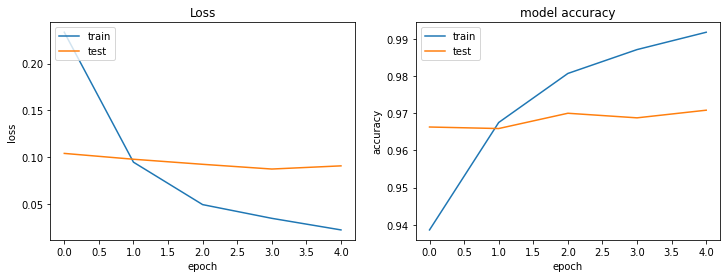

In [33]:
plt.figure(figsize=(12, 4))

# Loss(Number of epochs)
plt.subplot(1, 2, 1)
plt.plot(model_histiry_resnet.history["loss"])
plt.plot(model_histiry_resnet.history["val_loss"])
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")

# Accuracy(Number of epochs)
plt.subplot(1, 2, 2)
plt.plot(model_histiry_resnet.history["accuracy"])
plt.plot(model_histiry_resnet.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")

plt.show()

Let's try the same pictures of cat and dog respectively on the second model:


In [34]:
predict_class(cat_img, model)

Cat


In [35]:
predict_class(dog_img, model)


Cat
